# Analyze all the crimes from the API and to plot the results into a piechart.
## Identify the Top 3 Crimes and picking them for the rest of the analysis

The Top 3 Crimes are Assault, Theft from Motor Vehicle and Break and Enter. These crimes are then analysed one by one to reach at a conclusion on which is the safest place, what is the safest time to be in Toronto and to predict the next year's total crimes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
#create a variable to call the json for each crime type
types=["Assault","Auto_Theft","Break_and_Enter","Homicide_ASR_RC_TBL_002","Robbery","Theft_Over","Bicycle_Thefts","Shootings_and_Firearm_Discharges"
     ,"Theft_from_Motor_Vehicle"]
#variable to store the sum of each crime types
count=[]
#loop through each of the crime types to call the json to extract the total no of crimes
for types1 in types:
    try:
        url=f"https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/{types1}/FeatureServer/0/query?where=1%3D1&outFields=*&returnIdsOnly=true&outSR=4326&f=json"
        response_json=requests.get(url).json()
        count.append(response_json["objectIds"][-1])
    except:
        print("Cant find")


In [3]:
#Create data frame to store crime total for each of the crime type
count_df=pd.DataFrame({"type":types,"Count of crimes":count})
count_df=count_df.sort_values("Count of crimes",ascending=False)
count_df

,type,Count of crimes
0,Assault,161833
8,Theft_from_Motor_Vehicle,76914
2,Break_and_Enter,56466
1,Auto_Theft,40794
6,Bicycle_Thefts,30154
4,Robbery,29230
5,Theft_Over,9936
7,Shootings_and_Firearm_Discharges,5535
3,Homicide_ASR_RC_TBL_002,1286


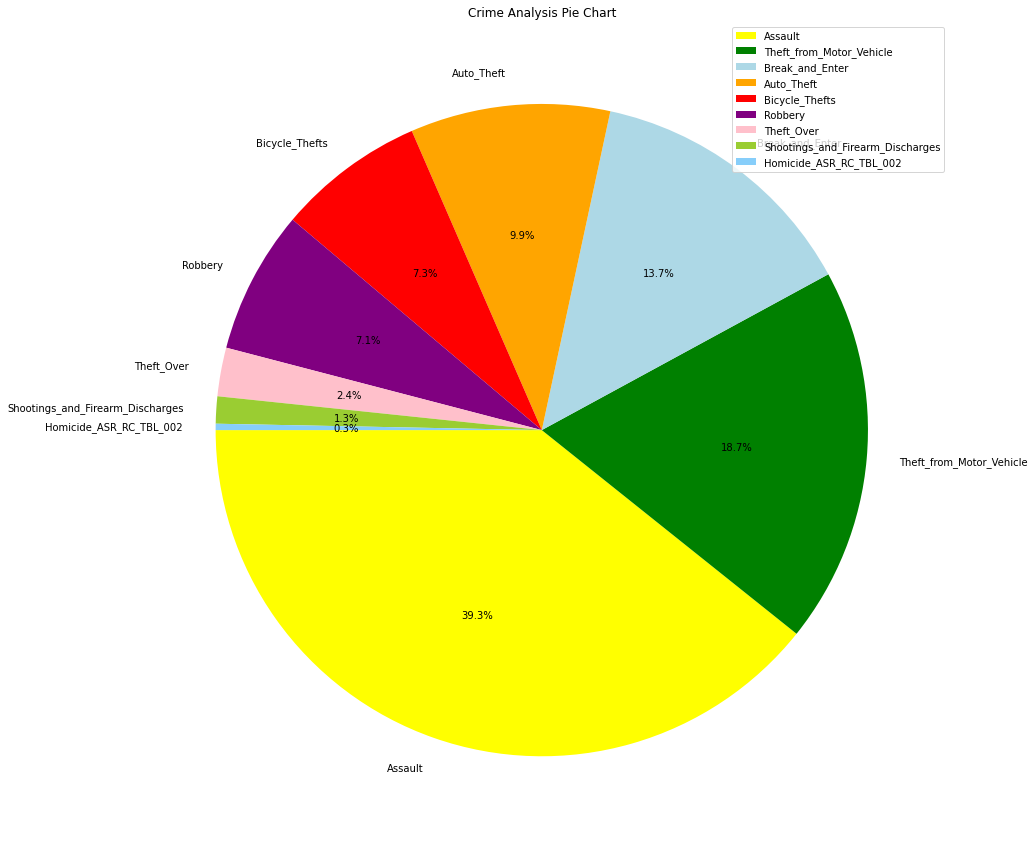

In [4]:
#Create a piechart to show the split of different crimes
colors = ["yellow", "green", "lightblue", "orange", "red",
          "purple", "pink", "yellowgreen", "lightskyblue"]

plt.figure(figsize=(20,15))
plt.pie(count_df["Count of crimes"],colors=colors,autopct='%1.1f%%',startangle=180,labels=count_df["type"])
plt.legend(count_df["type"],loc="best")
plt.title("Crime Analysis Pie Chart")
plt.savefig("Resources/Images/CrimeAnalysis.png")
plt.show()